In [ ]:
!wget "https://download1323.mediafire.com/9pqlmiq8hrogP8WhTp1zTHK3SRENK-MbLOXp2wtleNtzroreOEbeTjwLyORDKKtX8pE9IXQEuYp6qHHfZiubMkKfjh4h2r_X-UydWcoWeV5BRYy38UPVOtpxvHvwjA2wh0FlHn27NtUmdBJO6FU1heystQGB_RUxHduOF9ZRMomQZ9Q/sj9bgq1ys5878cl/diabetes.csv"

--2024-07-03 11:03:12--  https://download1323.mediafire.com/9pqlmiq8hrogP8WhTp1zTHK3SRENK-MbLOXp2wtleNtzroreOEbeTjwLyORDKKtX8pE9IXQEuYp6qHHfZiubMkKfjh4h2r_X-UydWcoWeV5BRYy38UPVOtpxvHvwjA2wh0FlHn27NtUmdBJO6FU1heystQGB_RUxHduOF9ZRMomQZ9Q/sj9bgq1ys5878cl/diabetes.csv
Resolving download1323.mediafire.com (download1323.mediafire.com)... 205.196.123.11
Connecting to download1323.mediafire.com (download1323.mediafire.com)|205.196.123.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23873 (23K) [text/plain]
Saving to: ‘diabetes.csv’

diabetes.csv        100%[===================>]  23.31K  --.-KB/s    in 0.05s   

2024-07-03 11:03:13 (518 KB/s) - ‘diabetes.csv’ saved [23873/23873]



In [ ]:
import pandas as pd

df = pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
#@title Normalize the first 8 features of the dataset
df.iloc[:, 0:8] = (df.iloc[:, 0:8] - df.iloc[:, 0:8].min()) / (df.iloc[:, 0:8].max() - df.iloc[:, 0:8].min())
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000,0
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000,0
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333,1


In [ ]:
import numpy as np
def GAF(sample):
  normalized_sample = (2 * (sample - sample.min())) / (sample.max() - sample.min()) - 1
  polar = np.array(np.arccos(normalized_sample))
  GAF = np.zeros((polar.size,polar.size))
  GAF = ((GAF + polar).T + polar).T
  GAF = np.cos(GAF)
  return GAF

X = df.iloc[:, :8].values
y = df['Outcome'].values

newX = []
newY = []

for x in range(len(X)):
  newX.append(GAF(X[x]))
  newY.append(y[x])

newX = np.array(newX)
newY = np.array(newY)

In [ ]:
newX[0].shape

(8, 8)

In [ ]:
#@title Defining the Training and Testing Set

from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train, X_test, y_train, y_test = train_test_split(newX, newY, test_size = 0.2, random_state = 42)

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 8,1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 8,1)

In [ ]:
X_test[0].shape

(8, 8, 1)

In [ ]:
#@title Training the model

from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Conv2D, MaxPooling2D,Dropout,BatchNormalization
import tensorflow as tf
from tensorflow.keras.optimizers import Adam,SGD

model = Sequential()
model.add(Conv2D(filters=6, kernel_size=(3,3), padding='same', activation='relu', input_shape=(8, 8,1)))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=16, kernel_size=(6,6), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(12,12), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2,strides=(2,2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

# model.add(Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape=(8, 8)))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))
# model.add(MaxPooling1D(pool_size=2))
# model.add(Flatten())
# model.add(Dense(128, activation='relu'))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_test,y_test), epochs=100, batch_size=32)


Epoch 1/100
20/20 [==============================] - 4s 34ms/step - loss: 0.8135 - accuracy: 0.5619 - val_loss: 0.6739 - val_accuracy: 0.6429
Epoch 2/100
20/20 [==============================] - 0s 12ms/step - loss: 0.7612 - accuracy: 0.5847 - val_loss: 0.6601 - val_accuracy: 0.6429
Epoch 3/100
20/20 [==============================] - 0s 13ms/step - loss: 0.7277 - accuracy: 0.6270 - val_loss: 0.6543 - val_accuracy: 0.6429
Epoch 4/100
20/20 [==============================] - 0s 15ms/step - loss: 0.7589 - accuracy: 0.5733 - val_loss: 0.6497 - val_accuracy: 0.6429
Epoch 5/100
20/20 [==============================] - 0s 19ms/step - loss: 0.6807 - accuracy: 0.6352 - val_loss: 0.6469 - val_accuracy: 0.6429
Epoch 6/100
20/20 [==============================] - 0s 21ms/step - loss: 0.6796 - accuracy: 0.6417 - val_loss: 0.6456 - val_accuracy: 0.6429
Epoch 7/100
20/20 [==============================] - 0s 21ms/step - loss: 0.6737 - accuracy: 0.6156 - val_loss: 0.6433 - val_accuracy: 0.6429
Epoch 

In [ ]:
# prompt: add new column in the dataset where you add all the values of the different column except the outcome

df['new_column'] = df.iloc[:, :8].sum(axis=1)


In [ ]:
# prompt: use rbf to separate  Glucose vs Outcome

from sklearn.svm import SVC

X = df[['Glucose', 'Outcome']].values

y = df['Outcome'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)

print(accuracy)


1.0


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

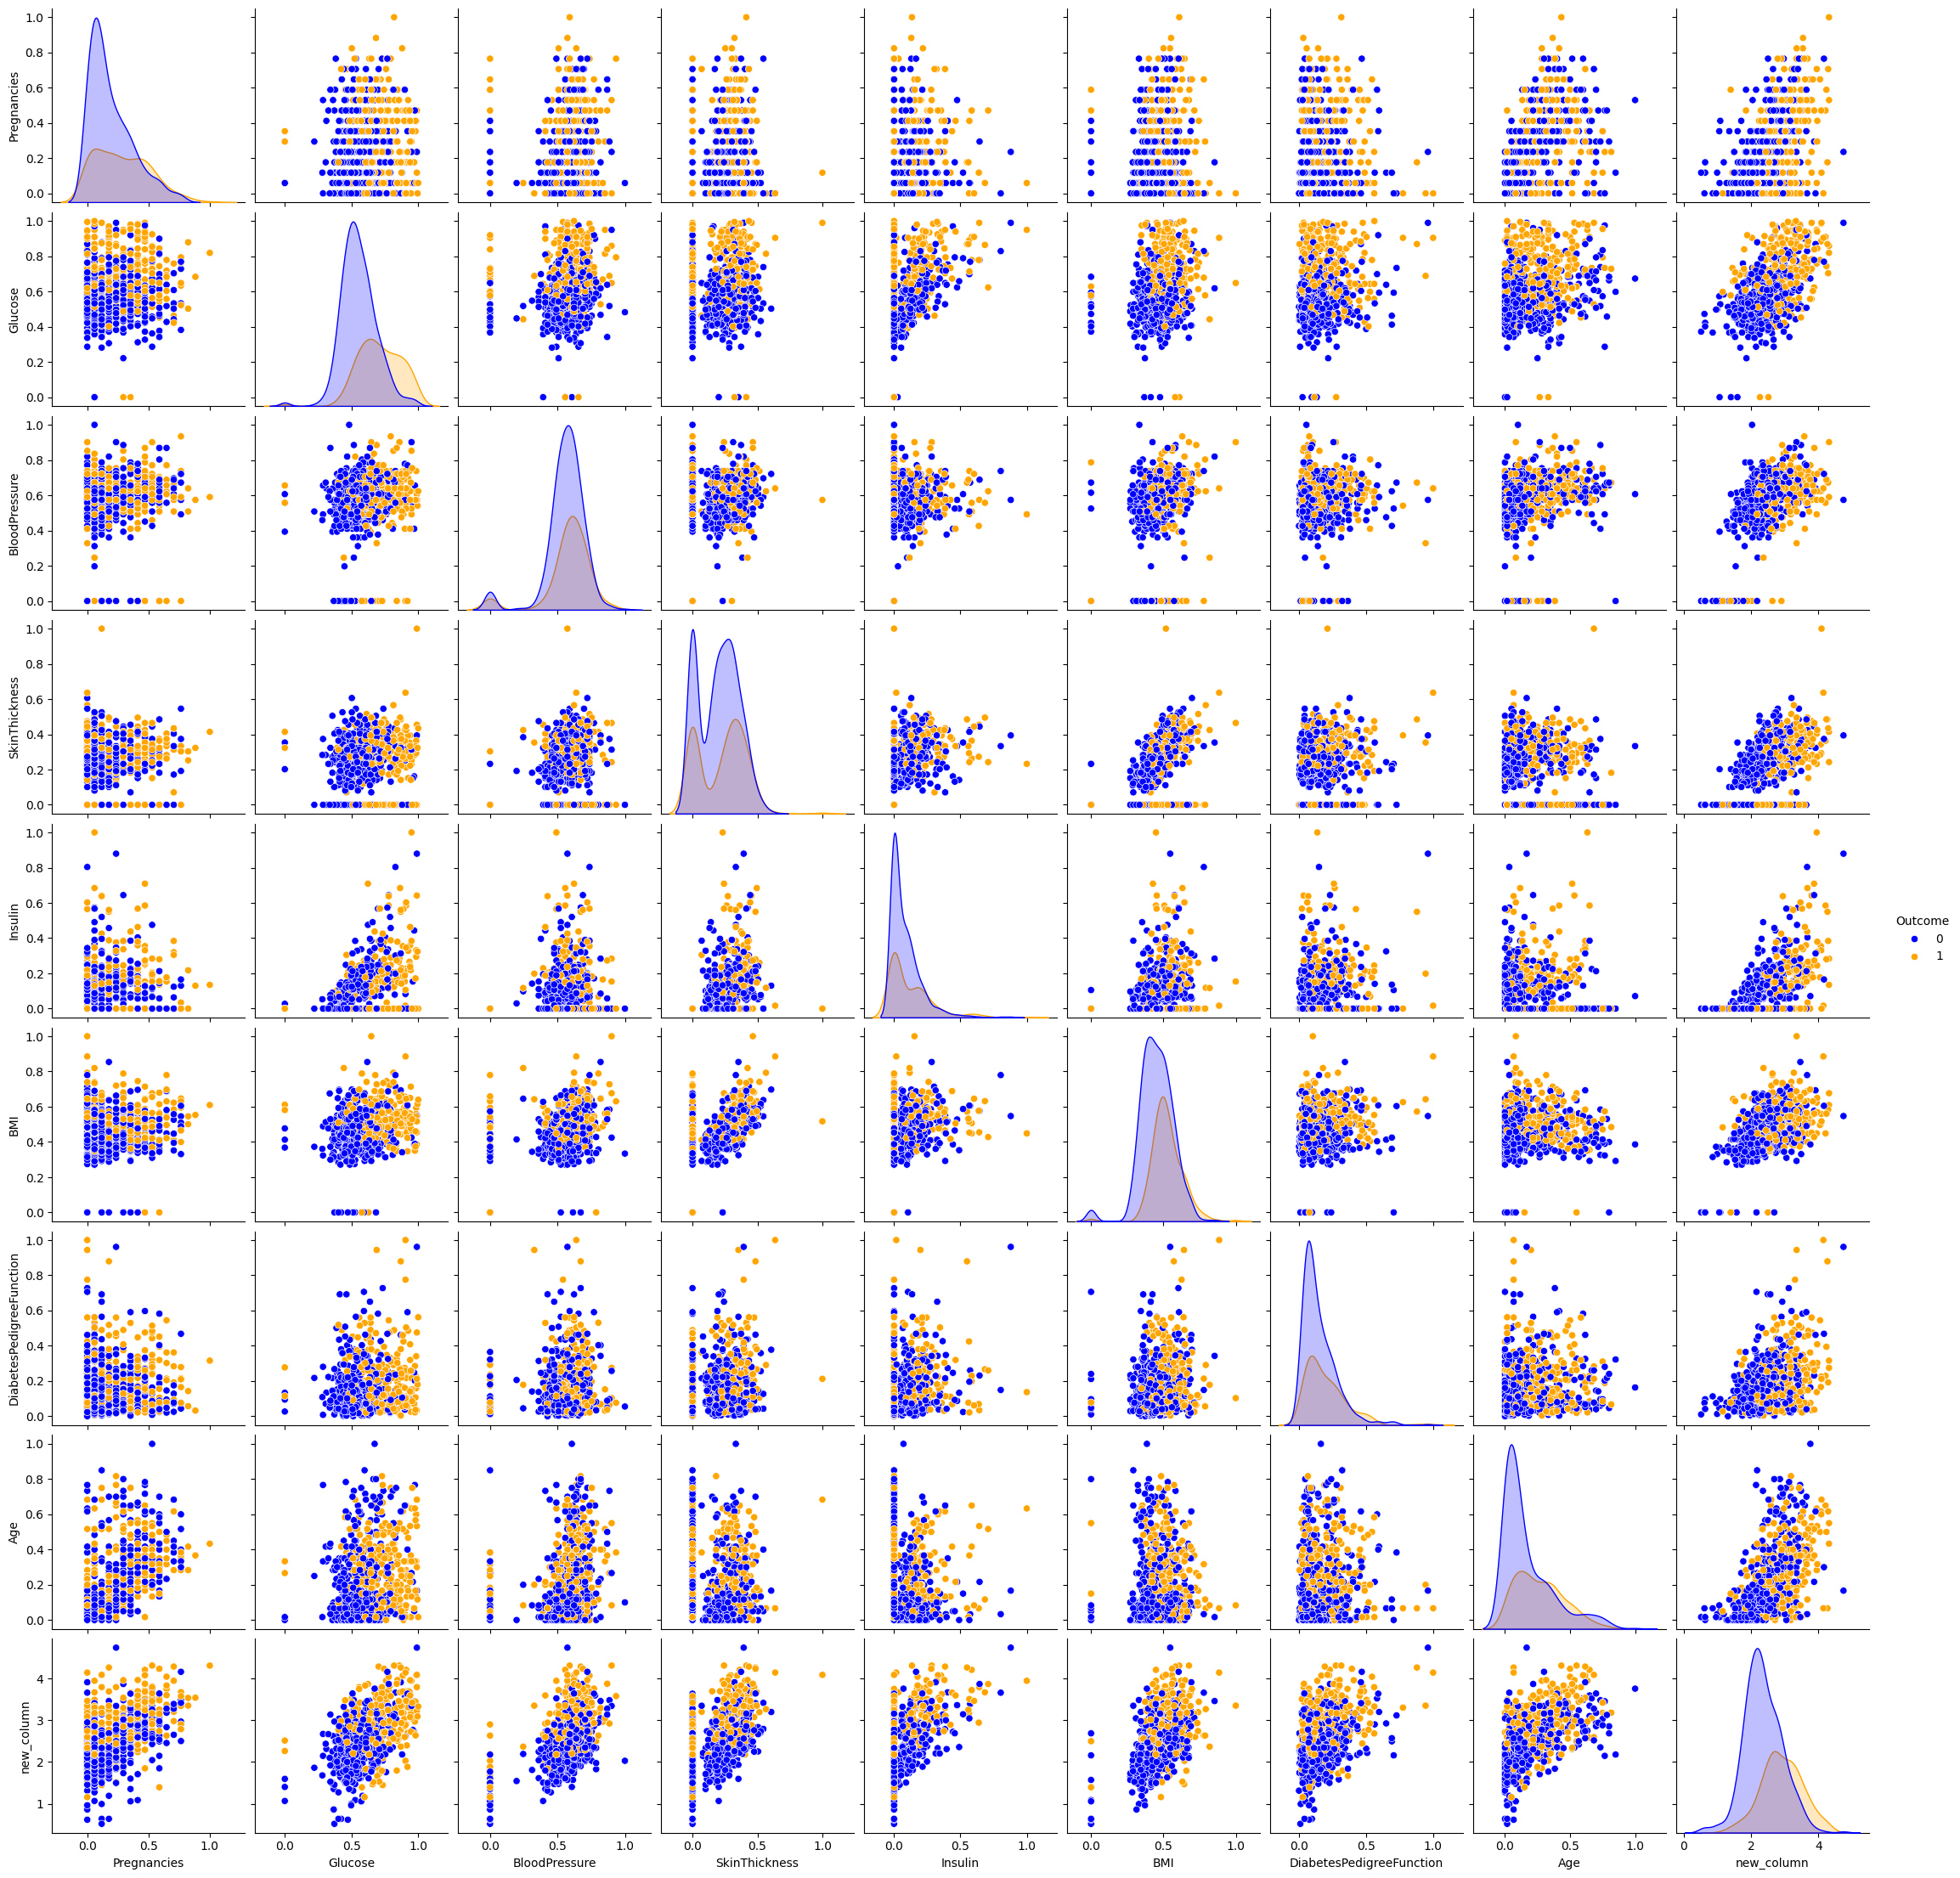

In [ ]:
#@title Pair Plots
import matplotlib.pyplot as plt
import seaborn as sns

# Create a pairplot of the first 8 columns of the DataFrame, colored by the target column
sns.pairplot(df, hue='Outcome', palette=['blue', 'orange'])

# Show the plot
plt.show()


In [ ]:
#@title SVM Defining
from sklearn import svm

# Create an SVM classifier
clf = svm.SVC(kernel='linear',gamma=0.1,C=1)

# Train the classifier on the training data
clf.fit(X_train[:,:,0], y_train)

# Predict the labels of the test data
y_pred = clf.predict(X_test[:,:,0])


In [ ]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0])

In [ ]:
#@title Test Accuracy Precision Recall and F1 Score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(y_test, y_pred)
print('Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(y_test, y_pred)
print('Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(y_test, y_pred)
print('F1 score: %f' % f1)
pd.DataFrame({
    "Accuracy": [accuracy],
    "Precision": [precision],
    "Recall": [recall],
    "F1 Score": [f1]
})

Accuracy: 0.753247
Precision: 0.654545
Recall: 0.654545
F1 score: 0.654545


,Accuracy,Precision,Recall,F1 Score
0,0.753247,0.654545,0.654545,0.654545
